Problem Statement

Customer personality anlysis is a detailed analysis of a conpany's ideal customers.It helps a business to better understand its customer and makes it eaiser for them to modify products according to the specific needs, behavoiors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending moeny to market a new product to every customer in company's database, a company can analyze which custome segment is most likely to buy the product and then market the product only on that particular segment.

Target

Perform clustering tp summarize customer segment

In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn_pandas import DataFrameMapper, gen_features

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_theme()

In [841]:
# The 'Set2' palette is a quaitive palette which is best for nominal and categorical data
palette = sns.color_palette('Set2') 


# The sns.set_context() function in Seaborn is a means to preset various parameters that control the appearance of plots. 

# In this case, you're using the "paper" context, which is one of the predefined contexts ('paper', 'notebook', 'talk', 'poster') that adjusts the scale of the plot elements. 
# This makes it suitable for including figures in a paper.

# The rc parameter allows for further customization of plot attributes. 
# It takes a dictionary of variables that override the values specified by the context.

sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11})


In [842]:
data = pd.read_csv('marketing_campaign.csv',
                  sep = '\t',
                  index_col = 'ID',
                  parse_dates = ['Dt_Customer'])

# We make ID as index_col so that it would be easier for us to find duplicates later.

In [843]:
data.head(10)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   
7446        1967      Master       Together  62513.0        0         1   
965         1971  Graduation       Divorced  55635.0        0         1   
6177        1985         PhD        Married  33454.0        1         0   
4855        1974         PhD       Together  30351.0        1         0   
5899        1950         PhD       Together   5648.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                              ...                      
5524  2012-04-09       58       635         88  ...                  7   
2174  2014-08-03       38        11          1  ...                  5   
4141  2013-08-21       26       426         49  ...                  4   
6182  2014-10-02       26        11          4  ...                  6   
5324  2014-01-19       94       173         43  ...                  5   
7446  2013-09-09       16       520         42  ...                  6   
965   2012-11-13       34       235         65  ...                  6   
6177  2013-08-05       32        76         10  ...                  8   
4855  2013-06-06       19        14          0  ...                  9   
5899  2014-03-13       68        28          0  ...                 20   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                           
5524             0             0             0             0             0   
2174             0             0             0             0             0   
4141             0             0             0             0             0   
6182             0             0             0             0             0   
5324             0             0             0             0             0   
7446             0             0             0             0             0   
965              0             0             0             0             0   
6177             0             0             0             0             0   
4855             0             0             0             0             0   
5899             1             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
ID                                                  
5524         0              3         11         1  
2174         0              3         11         0  
4141         0              3         11         0  
6182         0              3         11         0  
5324         0              3         11         0  
7446         0              3         11         0  
965          0              3         11         0  
6177         0              3         11         0  
4855         0              3         11         1  
5899         0              3         11         0  

[10 rows x 28 columns]

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [844]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

From data info, we note that:

1. There are missing values in income coloumn
2. Education and martial status are not numerical 

We shall fix that in EDA 

In [845]:
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [846]:
data['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [847]:
# As 'Z_CostContac' and 'Z_revenue' are not mentioned in the data description
# There are only one values in each data column. So we delete them
data.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

# EDA

Since we are going to use K-means clustering in our project. K-means clustering is a centroid-based clustering algorith, and as such, it is sensitive to outliers. Because centrods in K-means are determined based on the mean of th e points wihtin each other, outliers-data points that are significantly farther from the centroid than other points- can skew the position of the centroid, and by externsion, the result of the clustering.

If outliers are not important for the anlysis, it might be bebeficial to remove them prior to performing the clustering. Otherwie, they should be kept.

### Duplicates

In [848]:
data[data.duplicated(keep=False)].sort_values('Income')

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
6864         1989      Master       Divorced  10979.0        0         0   
10617        1989      Master       Divorced  10979.0        0         0   
234          1979  Graduation       Divorced  15287.0        1         0   
10264        1979  Graduation       Divorced  15287.0        1         0   
8420         1970    2n Cycle        Married  15315.0        0         0   
...           ...         ...            ...      ...      ...       ...   
5536         1959  Graduation       Together  87771.0        0         1   
6024         1953  Graduation       Together  94384.0        0         0   
5386         1953  Graduation       Together  94384.0        0         0   
4248         1960      Master         Single  98777.0        0         0   
7451         1960      Master         Single  98777.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
6864   2014-05-22       34         8          4  ...                    0   
10617  2014-05-22       34         8          4  ...                    0   
234    2012-10-10       60         1          2  ...                    1   
10264  2012-10-10       60         1          2  ...                    1   
8420   2013-03-08       27         7          4  ...                    0   
...           ...      ...       ...        ...  ...                  ...   
5536   2013-05-22       61      1492         38  ...                   10   
6024   2013-04-03       62      1111         24  ...                    8   
5386   2013-04-03       62      1111         24  ...                    8   
4248   2014-02-17       23      1000         19  ...                    6   
7451   2014-02-17       23      1000         19  ...                    6   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
6864                   3                  5             0             0   
10617                  3                  5             0             0   
234                    2                  7             1             0   
10264                  2                  7             1             0   
8420                   4                  5             0             0   
...                  ...                ...           ...           ...   
5536                   4                  6             0             1   
6024                   5                  2             0             1   
5386                   5                  2             0             1   
4248                   9                  1             0             1   
7451                   9                  1             0             1   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
6864              0             0             0         0         0  
10617             0             0             0         0         0  
234               0             0             0         0         1  
10264             0             0             0         0         1  
8420              0             0             0         0         0  
...             ...           ...           ...       ...       ...  
5536              1             1             1         0         1  
6024              1             1             0         0         1  
5386              1             1             0         0         1  
4248              0             0             0         0         0  
7451              0             0             0         0         0  

[358 rows x 26 columns]

In [849]:
data[data.duplicated()].sort_values('Income')

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
10617        1989      Master       Divorced  10979.0        0         0   
234          1979  Graduation       Divorced  15287.0        1         0   
10065        1970    2n Cycle        Married  15315.0        0         0   
24           1960      Master       Together  17144.0        1         1   
10304        1959  Graduation        Married  18690.0        0         0   
...           ...         ...            ...      ...      ...       ...   
1745         1962         PhD       Divorced  85696.0        0         0   
5830         1972         PhD         Single  86857.0        0         0   
5536         1959  Graduation       Together  87771.0        0         1   
6024         1953  Graduation       Together  94384.0        0         0   
7451         1960      Master         Single  98777.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
10617  2014-05-22       34         8          4  ...                    0   
234    2012-10-10       60         1          2  ...                    1   
10065  2013-03-08       27         7          4  ...                    0   
24     2014-02-15       96        18          2  ...                    0   
10304  2012-12-28       77         6          1  ...                    1   
...           ...      ...       ...        ...  ...                  ...   
1745   2013-03-05       88       714         76  ...                    6   
5830   2012-12-09       96       899        102  ...                    6   
5536   2013-05-22       61      1492         38  ...                   10   
6024   2013-04-03       62      1111         24  ...                    8   
7451   2014-02-17       23      1000         19  ...                    6   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
10617                  3                  5             0             0   
234                    2                  7             1             0   
10065                  4                  5             0             0   
24                     4                  7             0             0   
10304                  2                  8             0             0   
...                  ...                ...           ...           ...   
1745                   9                  1             0             0   
5830                  10                  2             0             0   
5536                   4                  6             0             1   
6024                   5                  2             0             1   
7451                   9                  1             0             1   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
10617             0             0             0         0         0  
234               0             0             0         0         1  
10065             0             0             0         0         0  
24                0             0             0         0         0  
10304             0             0             0         0         0  
...             ...           ...           ...       ...       ...  
1745              0             0             0         0         1  
5830              0             0             0         0         1  
5536              1             1             1         0         1  
6024              1             1             0         0         1  
7451              0             0             0         0         0  

[182 rows x 26 columns]

In [850]:
# Without consulting the dataset author, I am not sure their validity, but I drop them this time.
# Probably the same customer register more than once for some reason. It's ok to just keep one record.
data.drop_duplicates(inplace = True)

In [851]:
print('The last day the client enrolled:', data['Dt_Customer'].dt.date.max())
print('The first day the client enrolled:', data['Dt_Customer'].dt.date.min())

The last day the client enrolled: 2014-12-06
The first day the client enrolled: 2012-01-08


### Year Birth

In [852]:
# Transform Year_Birth to Age
data['Age'] = 2023 - data['Year_Birth']

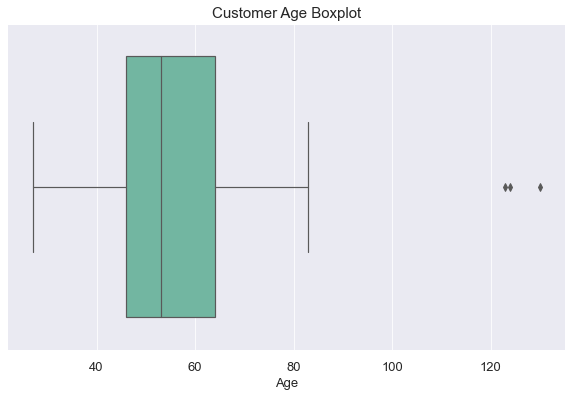

In [853]:
plt.figure(figsize=(10, 6))
plt.title('Customer Age Boxplot')
sns.boxplot(data['Age'], palette = palette)
plt.show()

In [854]:
data.query('Age > 90')

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                       
7829         1900  2n Cycle       Divorced  36640.0        1         0   
11004        1893  2n Cycle         Single  60182.0        0         1   
1150         1899       PhD       Together  83532.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
ID                                               ...                      
7829   2013-09-26       99        15          6  ...                  2   
11004  2014-05-17       23         8          0  ...                  2   
1150   2013-09-26       36       755        144  ...                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
7829                   5             0             0             0   
11004                  4             0             0             0   
1150                   1             0             0             1   

       AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
ID                                                          
7829              0             0         1         0  123  
11004             0             0         0         0  130  
1150              0             0         0         0  124  

[3 rows x 27 columns]

They are really old customer. As far as I know, the oldest human being in the world recored is 122 years. But we have 3 customer who outlived the world record. We appreciate them but we see them as outliers and will not include them in the training.

### Dt_Customer

In [855]:
data['CustomerFor'] = (np.datetime64('today') - data['Dt_Customer']).dt.days # Num of days since the customer enrolled

### Income

In [856]:
data['Income']

ID
5524      58138.0
2174      46344.0
4141      71613.0
6182      26646.0
5324      58293.0
           ...   
9432     666666.0
10870     61223.0
7270      56981.0
8235      69245.0
9405      52869.0
Name: Income, Length: 2058, dtype: float64

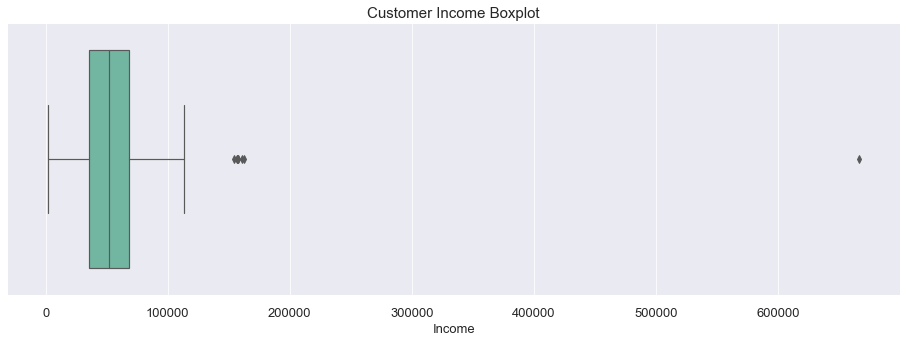

In [857]:
plt.figure(figsize=(16, 5))
plt.title('Customer Income Boxplot')
ax = sns.boxplot(data['Income'], palette = palette)
plt.show()

There are some outliers. Since we are using cluster method and more than 2000 rows are below 120000, I shall not including them in training 

In [858]:
data.query('Income > 120000').sort_values('Income')

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                          
5555         1975  Graduation       Divorced  153924.0        0         0   
11181        1949         PhD        Married  156924.0        0         0   
4931         1977  Graduation       Together  157146.0        0         0   
8475         1973         PhD        Married  157243.0        0         1   
5336         1971      Master       Together  157733.0        1         0   
1501         1982         PhD        Married  160803.0        0         0   
1503         1976         PhD       Together  162397.0        1         1   
9432         1977  Graduation       Together  666666.0        1         0   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                               ...                      
5555   2014-07-02       81         1          1  ...                  0   
11181  2013-08-29       85         2          1  ...                  0   
4931   2013-04-29       13         1          0  ...                  1   
8475   2014-01-03       98        20          2  ...                  0   
5336   2013-04-06       37        39          1  ...                  1   
1501   2012-04-08       21        55         16  ...                  0   
1503   2013-03-06       31        85          1  ...                  1   
9432   2013-02-06       23         9         14  ...                  6   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                            
5555              0             0             0             0             0   
11181             0             0             0             0             0   
4931              0             0             0             0             0   
8475              0             0             0             0             0   
5336              0             0             0             0             0   
1501              0             0             0             0             0   
1503              0             0             0             0             0   
9432              0             0             0             0             0   

       Complain  Response  Age  CustomerFor  
ID                                           
5555          0         0   48         3257  
11181         0         0   74         3564  
4931          0         0   46         3686  
8475          0         0   50         3437  
5336          0         0   52         3709  
1501          0         0   41         4072  
1503          0         0   47         3740  
9432          0         0   46         3768  

[8 rows x 28 columns]

Although there is no reason to consider these values invalid, we drop them later while training.

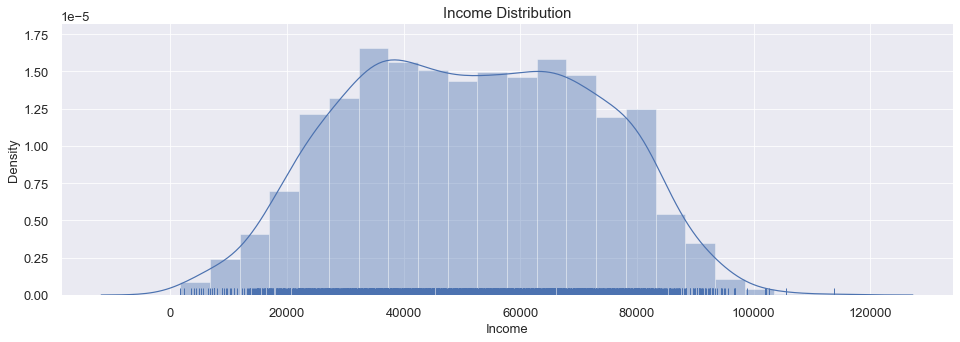

In [859]:
# Distribution plot for Income
plt.figure(figsize=(16, 5))
plt.title('Income Distribution')
ax = sns.distplot(data.query('Income < 150000')['Income'], rug= True)

In [860]:
# NAs
print(f'There are {data["Income"].isna().sum()} NAs in Income column')

There are 24 NAs in Income column


In [861]:
# Fill the na calue with median.
# Since income distribution is normal, it's felxible this time.
data['Income'].fillna(data['Income'].median(), inplace=True)

### Education

In [862]:
data['Education'].value_counts()

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64

All countries conveyed their national systems into two cycle structures consisting of a first(undergraduate) cycle and second(graduate) cycle.

'2n Cycle' refers to Master. 
'Gaduation' is not specific. We will merge it undergraduate for this time.

In [863]:
data['Education'].replace({ '2n Cycle': 'Master',
                            'Graduation': 'Undergraduate'}, inplace=True)

In [864]:
data['Education'].value_counts()

Undergraduate    1030
Master            529
PhD               450
Basic              49
Name: Education, dtype: int64

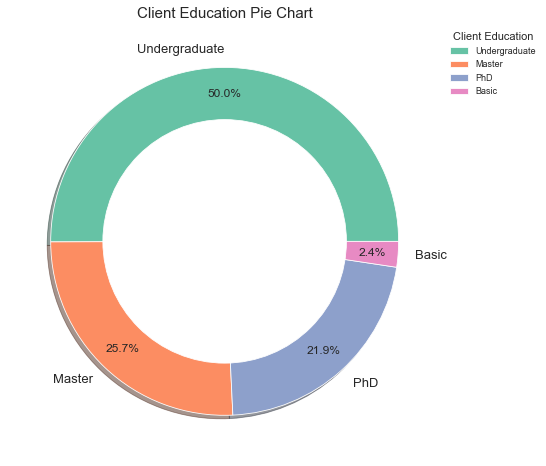

In [865]:
size = dict(data['Education'].value_counts())

plt.figure(figsize=(8,8))
plt.title('Client Education Pie Chart')
plt.pie(size.values(), labels=size.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True,  colors=palette)
plt.legend(title='Client Education', labels=size.keys(), bbox_to_anchor=(1, 1))

# Plot a circle in the center to transform it in a donut chart
mid_circle = plt.Circle((0,0), 0.7, color = 'white')
p=plt.gcf()
p.gca().add_artist(mid_circle)

plt.show()

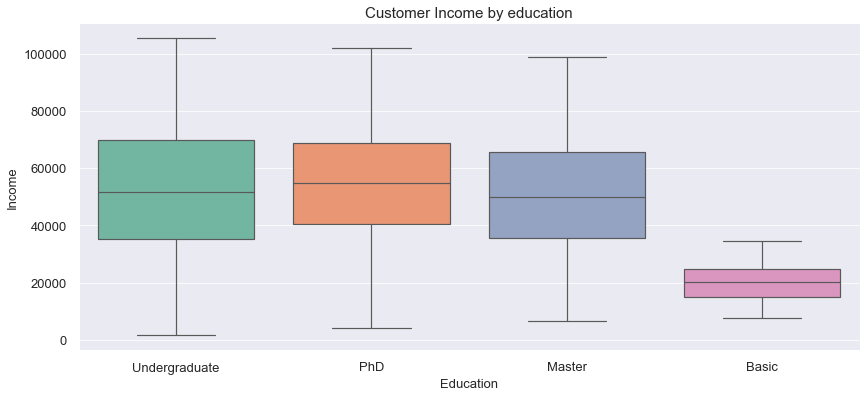

In [866]:
plt.figure(figsize=(14, 6))
plt.title('Customer Income by education')
sns.boxplot(data=data.query('Income < 200000'), x='Education', y='Income', palette=palette, showfliers=False)
plt.show()

### Marital Status

In [867]:
data['Marital_Status'].value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [868]:
# We merge alone to single, Absurd and Yolo to other
# The client is better not to be denoted as various status, but the presence of the partner
data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO', 'Widow', 'Divorced', 'Married' ], 
                               ['Single', 'Single', 'Single', 'Single', 'Single', 'Together'], inplace=True)

In [869]:
data['HasPartner'] = data['Marital_Status'].replace({ 'Single': 0, 'Together': 1})
data['HasPartner'].value_counts()

1    1316
0     742
Name: HasPartner, dtype: int64

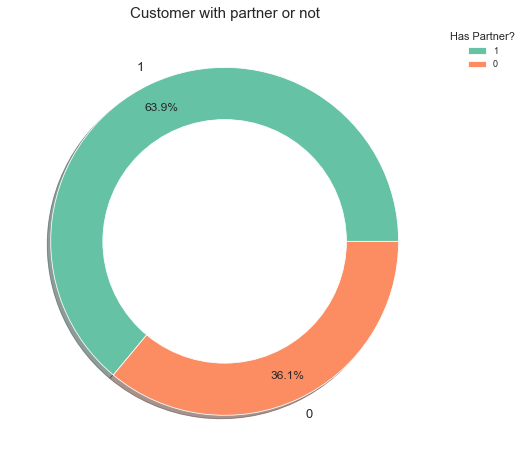

In [870]:
size = dict(data['HasPartner'].value_counts())

plt.figure(figsize=(8,8))
plt.title('Customer with partner or not')
plt.pie(size.values(), labels=size.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True,  colors=palette)
plt.legend(title='Has Partner?', labels=size.keys(), bbox_to_anchor=(1, 1))

# Plot a circle in the center to transform it in a donut chart
mid_circle = plt.Circle((0,0), 0.7, color = 'white')
p=plt.gcf()
p.gca().add_artist(mid_circle)

plt.show()

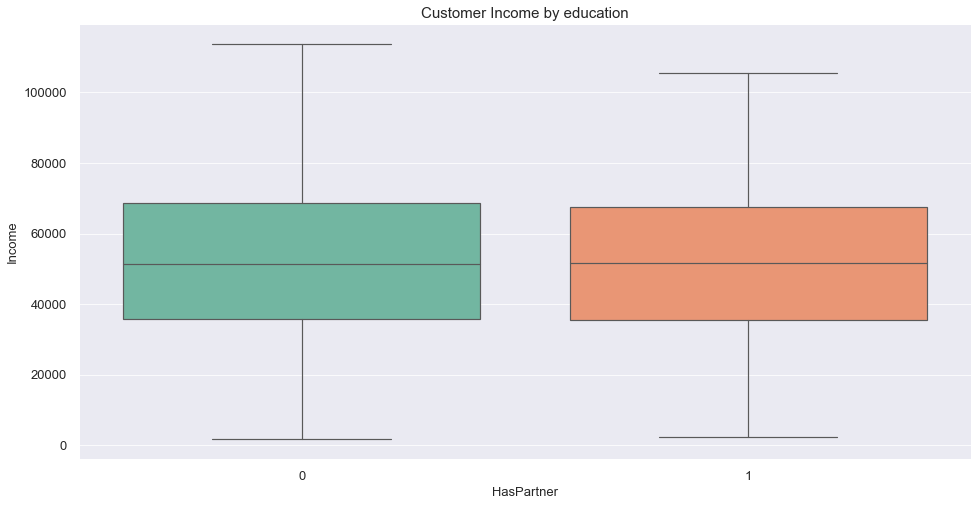

In [871]:
plt.figure(figsize=(16, 8))
plt.title('Customer Income by education')
sns.boxplot(data=data.query('Income < 200000'), x='HasPartner', y='Income', palette=palette, showfliers=False)
plt.show()

### Kidhome and Teenhome

In [872]:
data['Kidhome'].value_counts()

0    1184
1     831
2      43
Name: Kidhome, dtype: int64

In [873]:
data['Teenhome'].value_counts()

0    1060
1     948
2      50
Name: Teenhome, dtype: int64

Here we consider all the children in the family, and combine them in NumChildren

Then introduce feature HasChildren = 1 while NumChildren > 0, otherwise 0.

In [874]:
data['NumChildren'] = data['Kidhome'] + data['Teenhome']
data['HasChildren'] = (data['NumChildren'] >= 1).astype('int64') #Convert Ture or Flase to 1 or 0

In [875]:
data['HasChildren'].value_counts()

1    1481
0     577
Name: HasChildren, dtype: int64

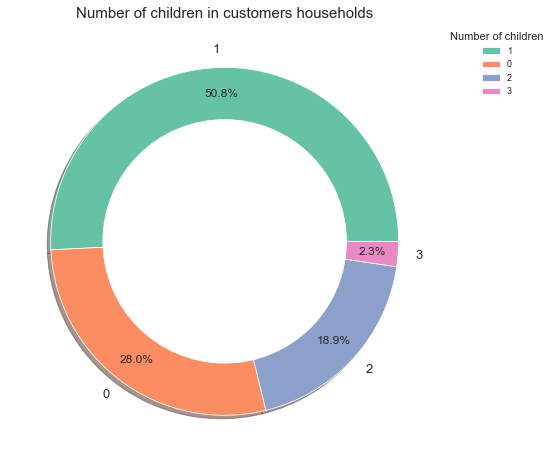

In [876]:
sizes = dict(data['NumChildren'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Number of children in customers households")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette )
plt.legend(title="Number of children", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

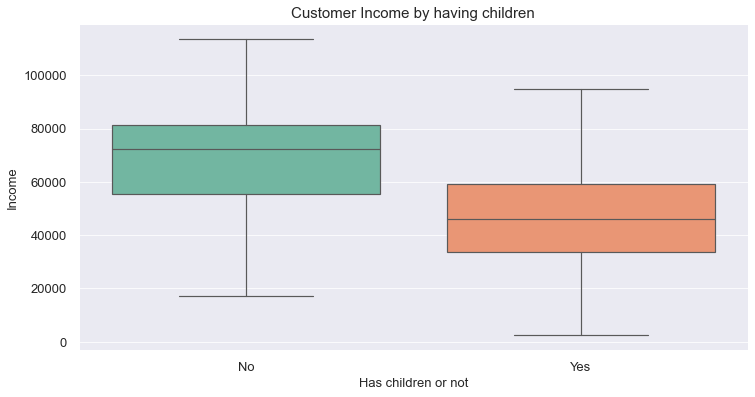

In [877]:
plt.figure(figsize=(12, 6))
plt.title('Customer Income by having children')
ax = sns.boxplot(data=data.query('Income < 200000'), x='HasChildren', y='Income', palette=palette, showfliers=False)
ax.set_xticklabels(['No','Yes'])
ax.set_xlabel('Has children or not')
plt.show()

Customer without children seems to have larger income

### Amount Spent

In [878]:
data.filter(like='Mnt')

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
ID                                                             
5524        635         88              546              172   
2174         11          1                6                2   
4141        426         49              127              111   
6182         11          4               20               10   
5324        173         43              118               46   
...         ...        ...              ...              ...   
9432          9         14               18                8   
10870       709         43              182               42   
7270        908         48              217               32   
8235        428         30              214               80   
9405         84          3               61                2   

       MntSweetProducts  MntGoldProds  
ID                                     
5524                 88            88  
2174                  1             6  
4141                 21            42  
6182                  3             5  
5324                 27            15  
...                 ...           ...  
9432                  1            12  
10870               118           247  
7270                 12            24  
8235                 30            61  
9405                  1            21  

[2058 rows x 6 columns]

In [879]:
mnt = data.filter(like='Mnt').apply(lambda x: sum(x), axis = 0)
mnt

MntWines            625471
MntFruits            53991
MntMeatProducts     345136
MntFishProducts      76824
MntSweetProducts     55930
MntGoldProds         90291
dtype: int64

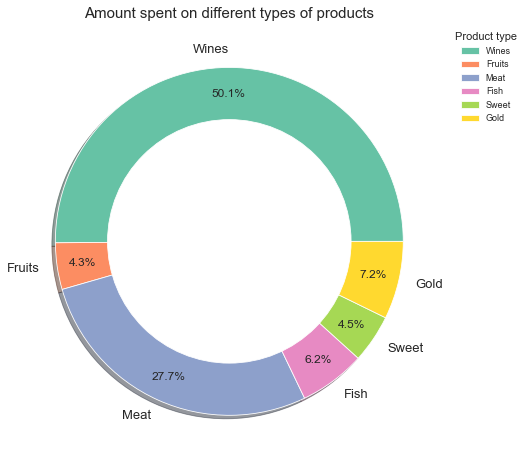

In [880]:
names = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
sizes = dict(mnt)

plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes.values(), labels=names, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.legend(title="Product type", labels=names, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [881]:
# Customer's total spending 
data['Spent'] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [882]:
# Rename the column for clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [883]:
# Percent of amount spent on each product
data = data.assign(
        percentWines=lambda x: x['Wines'] / x['Spent'] * 100,
        percentMeat=lambda x: x['Meat'] / x['Spent'] * 100,
        percentFruits=lambda x: x['Fruits'] / x['Spent'] * 100,
        percentFish=lambda x: x['Fish'] / x['Spent'] * 100,
        percentSweets=lambda x: x['Sweets'] / x['Spent'] * 100,
        percentGold=lambda x: x['Gold'] / x['Spent'] * 100,
)

In [884]:
data.filter(like = 'percent')

percentWines  percentMeat  percentFruits  percentFish  percentSweets  \
ID                                                                            
5524      39.270254    33.766234       5.442177    10.636982       5.442177   
2174      40.740741    22.222222       3.703704     7.407407       3.703704   
4141      54.896907    16.365979       6.314433    14.304124       2.706186   
6182      20.754717    37.735849       7.547170    18.867925       5.660377   
5324      40.995261    27.962085      10.189573    10.900474       6.398104   
...             ...          ...            ...          ...            ...   
9432      14.516129    29.032258      22.580645    12.903226       1.612903   
10870     52.870992    13.571961       3.206562     3.131991       8.799403   
7270      73.166801    17.485898       3.867849     2.578566       0.966962   
8235      50.771056    25.385528       3.558719     9.489917       3.558719   
9405      48.837209    35.465116       1.744186     1.162791       0.581395   

       percentGold  
ID                  
5524      5.442177  
2174     22.222222  
4141      5.412371  
6182      9.433962  
5324      3.554502  
...            ...  
9432     19.354839  
10870    18.419090  
7270      1.933924  
8235      7.236062  
9405     12.209302  

[2058 rows x 6 columns]

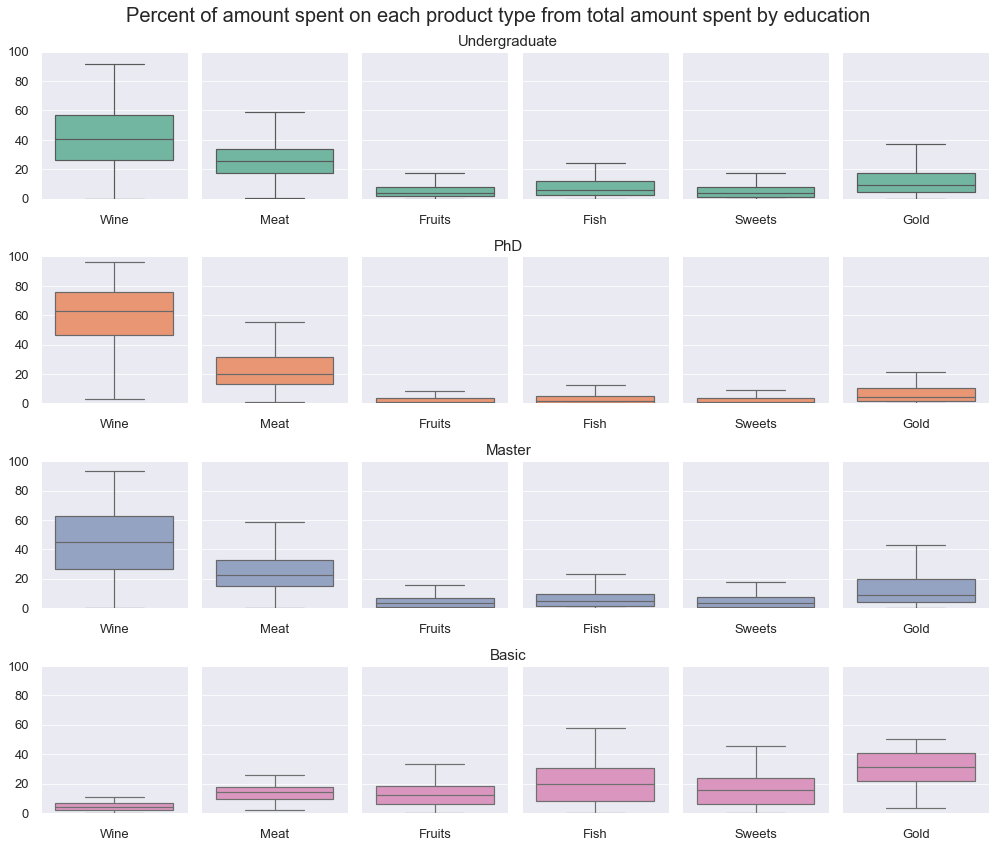

In [885]:
fig, axes = plt.subplots(4, 6, figsize=(14, 12), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by education', fontsize=20)

for i, value in enumerate(data['Education'].unique()):
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentWines', showfliers=False, color=palette[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentMeat', showfliers=False, color=palette[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFruits', showfliers=False, color=palette[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'{value}', x=1)
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFish', showfliers=False, color=palette[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentSweets', showfliers=False, color=palette[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentGold', showfliers=False, color=palette[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

Basic customers spent not much on wine and meat, compared with others, but other products, especially gold.

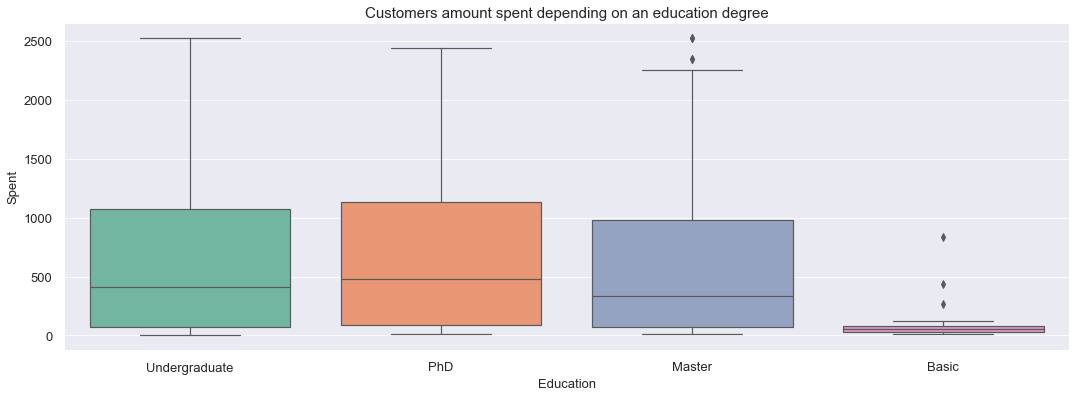

In [886]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='Education', y='Spent', palette=palette)
plt.title('Customers amount spent depending on an education degree')

plt.show()

Basic customer had the minimum total amount spent. THis might because the number for this group is minimum.

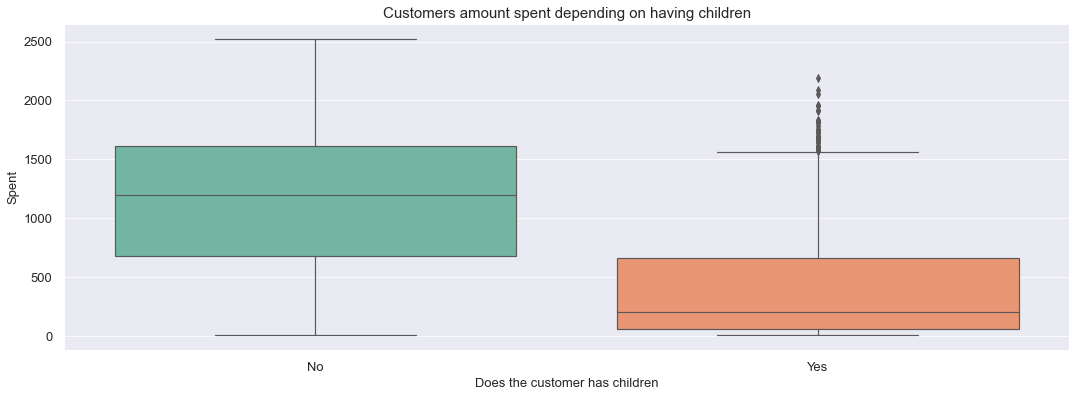

In [887]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='HasChildren', y='Spent', palette=palette)
plt.title('Customers amount spent depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

Customer without children tend to spend more

### Number of purchases

In [888]:
# NumDealsPurchases: Number of purchases made with a discount, not in specific place like web, catalog
# We will not include it.
num_p = data.filter(regex = 'Purchases').sum(axis = 0)
num_p

NumDealsPurchases       4814
NumWebPurchases         8435
NumCatalogPurchases     5476
NumStorePurchases      11876
dtype: int64

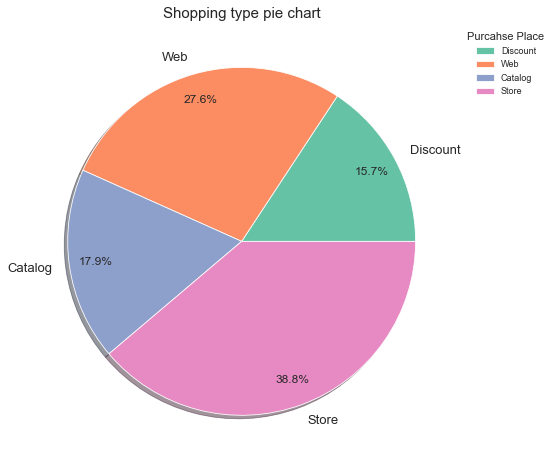

In [889]:
size = dict(num_p)
lb = ['Discount', 'Web', 'Catalog', 'Store']

plt.figure(figsize=(12,8))
plt.title('Shopping type pie chart')
plt.pie(size.values(), labels = lb, autopct ='%.1f%%', pctdistance=0.85, shadow=True, colors=palette)
plt.legend(title='Purcahse Place', labels=lb, bbox_to_anchor=(1, 1))

plt.show()

Most customer purchase products in store.

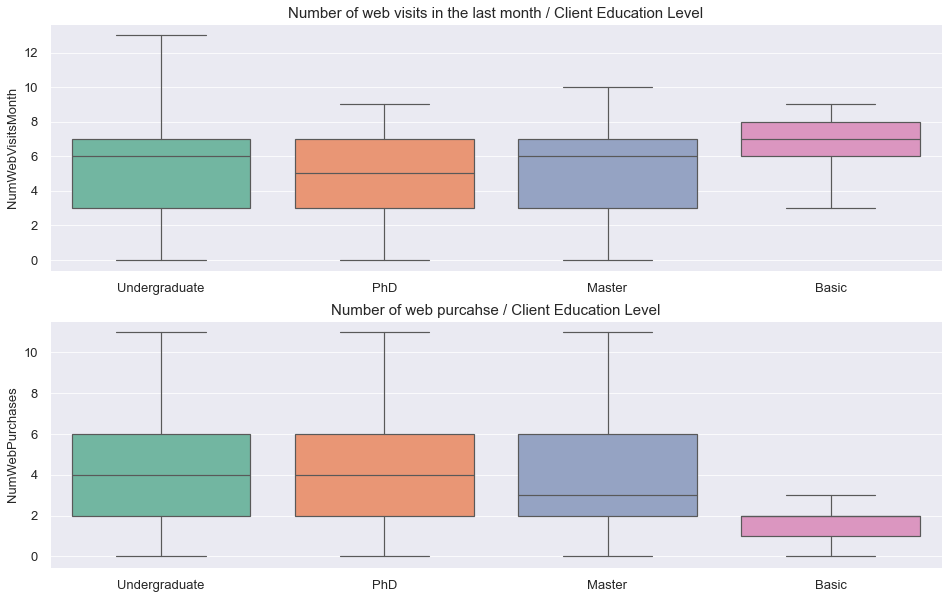

In [890]:
fig, axes = plt.subplots(2, 1, figsize= (16, 10))

sns.boxplot(data=data, x='Education', y='NumWebVisitsMonth', palette=palette, showfliers=False, ax=axes[0])
axes[0].set_title('Number of web visits in the last month / Client Education Level')
axes[0].set_xlabel('')

sns.boxplot(data=data, x='Education', y='NumWebPurchases', palette=palette, showfliers=False, ax=axes[1])
axes[1].set_title('Number of web purcahse / Client Education Level')
axes[1].set_xlabel('')

plt.show()

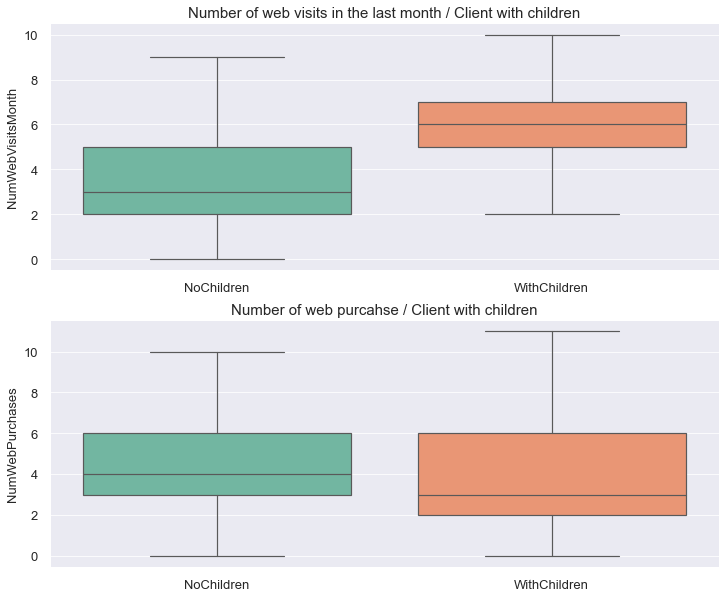

In [891]:
fig, axes = plt.subplots(2, 1, figsize= (12, 10))

sns.boxplot(data=data, x='HasChildren', y='NumWebVisitsMonth', palette=palette, showfliers=False, ax=axes[0])
axes[0].set_title('Number of web visits in the last month / Client with children')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['NoChildren', 'WithChildren'])

sns.boxplot(data=data, x='HasChildren', y='NumWebPurchases', palette=palette, showfliers=False, ax=axes[1])
axes[1].set_title('Number of web purcahse / Client with children')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['NoChildren', 'WithChildren'])

plt.show()

In [892]:
# NumTotalPurchases is the sum of all purchases for each customer
data['NumTotalPurchases'] = data.filter(regex='Purchases').sum(axis=1)

We found that there are 4 customer who made no puchase but their total spent > 0.

In [893]:
data.loc[(data["NumTotalPurchases"] == 0) & (data['Spent'] != 0)]

Year_Birth      Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                             
5555         1975  Undergraduate         Single  153924.0        0         0   
3955         1965  Undergraduate         Single    4861.0        0         0   
11110        1973  Undergraduate         Single    3502.0        1         0   
11181        1949            PhD       Together  156924.0        0         0   

      Dt_Customer  Recency  Wines  Fruits  ...  NumChildren  HasChildren  \
ID                                         ...                             
5555   2014-07-02       81      1       1  ...            0            0   
3955   2014-06-22       20      2       1  ...            0            0   
11110  2013-04-13       56      2       1  ...            1            1   
11181  2013-08-29       85      2       1  ...            0            0   

       Spent  percentWines  percentMeat  percentFruits  percentFish  \
ID                                                                    
5555       6     16.666667    16.666667      16.666667    16.666667   
3955       6     33.333333    16.666667      16.666667    16.666667   
11110      5     40.000000    20.000000      20.000000     0.000000   
11181      8     25.000000    25.000000      12.500000    12.500000   

       percentSweets  percentGold  NumTotalPurchases  
ID                                                    
5555       16.666667    16.666667                  0  
3955        0.000000    16.666667                  0  
11110       0.000000    20.000000                  0  
11181      12.500000    12.500000                  0  

[4 rows x 39 columns]

### Accepted Campaigns

In [894]:
# Response = 1 means the customer accepted the offer in the last campaign
data['TotalAccepted'] = data.filter(regex='Accepted|Response').sum(axis = 1)
data['TotalAccepted'].value_counts()

0    1489
1     347
2     133
3      47
4      33
5       9
Name: TotalAccepted, dtype: int64

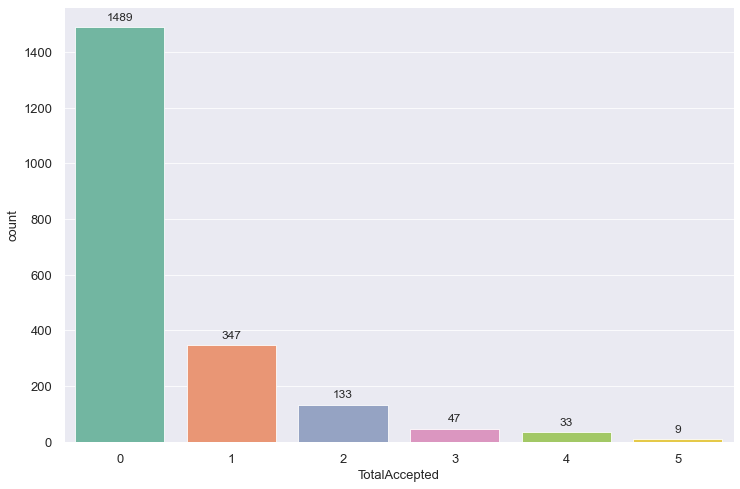

In [895]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(data['TotalAccepted'], palette=palette)
plt.title('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

Most cusmoter don't accpet campaigns. The number of customers decrease as the total accepted campaigns increase.

### Data Cleaning

In [896]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 5524 to 9405
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2058 non-null   int64         
 1   Education            2058 non-null   object        
 2   Marital_Status       2058 non-null   object        
 3   Income               2058 non-null   float64       
 4   Kidhome              2058 non-null   int64         
 5   Teenhome             2058 non-null   int64         
 6   Dt_Customer          2058 non-null   datetime64[ns]
 7   Recency              2058 non-null   int64         
 8   Wines                2058 non-null   int64         
 9   Fruits               2058 non-null   int64         
 10  Meat                 2058 non-null   int64         
 11  Fish                 2058 non-null   int64         
 12  Sweets               2058 non-null   int64         
 13  Gold                 2058 non-

In [897]:
# Drop the outliers 
data.drop(data[(data['Age'] > 100) |(data['Income'] > 140000)].index, inplace = True)

# Copy the data so far for clustering analysis
df = data.copy()

# Drop the old columns
data_cleaned = data.drop(columns = ['Dt_Customer', 'Year_Birth' , 'Marital_Status'])

In [898]:
data_cleaned.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
ID                                                                              
5524  Undergraduate  58138.0        0         0       58    635      88   546   
2174  Undergraduate  46344.0        1         1       38     11       1     6   
4141  Undergraduate  71613.0        0         0       26    426      49   127   
6182  Undergraduate  26646.0        1         0       26     11       4    20   
5324            PhD  58293.0        1         0       94    173      43   118   

      Fish  Sweets  ...  HasChildren  Spent  percentWines  percentMeat  \
ID                  ...                                                  
5524   172      88  ...            0   1617     39.270254    33.766234   
2174     2       1  ...            1     27     40.740741    22.222222   
4141   111      21  ...            0    776     54.896907    16.365979   
6182    10       3  ...            1     53     20.754717    37.735849   
5324    46      27  ...            1    422     40.995261    27.962085   

      percentFruits  percentFish  percentSweets  percentGold  \
ID                                                             
5524       5.442177    10.636982       5.442177     5.442177   
2174       3.703704     7.407407       3.703704    22.222222   
4141       6.314433    14.304124       2.706186     5.412371   
6182       7.547170    18.867925       5.660377     9.433962   
5324      10.189573    10.900474       6.398104     3.554502   

      NumTotalPurchases  TotalAccepted  
ID                                      
5524                 25              1  
2174                  6              0  
4141                 21              0  
6182                  8              0  
5324                 19              0  

[5 rows x 37 columns]

In [899]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 5524 to 9405
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2047 non-null   object 
 1   Income               2047 non-null   float64
 2   Kidhome              2047 non-null   int64  
 3   Teenhome             2047 non-null   int64  
 4   Recency              2047 non-null   int64  
 5   Wines                2047 non-null   int64  
 6   Fruits               2047 non-null   int64  
 7   Meat                 2047 non-null   int64  
 8   Fish                 2047 non-null   int64  
 9   Sweets               2047 non-null   int64  
 10  Gold                 2047 non-null   int64  
 11  NumDealsPurchases    2047 non-null   int64  
 12  NumWebPurchases      2047 non-null   int64  
 13  NumCatalogPurchases  2047 non-null   int64  
 14  NumStorePurchases    2047 non-null   int64  
 15  NumWebVisitsMonth    2047 non-null 

In [900]:
# We select the numericals, not dummies
Numericals = ['Age', 'Income', 'NumChildren', 'Recency', 'Spent', 'NumTotalPurchases', 'TotalAccepted', 'CustomerFor']


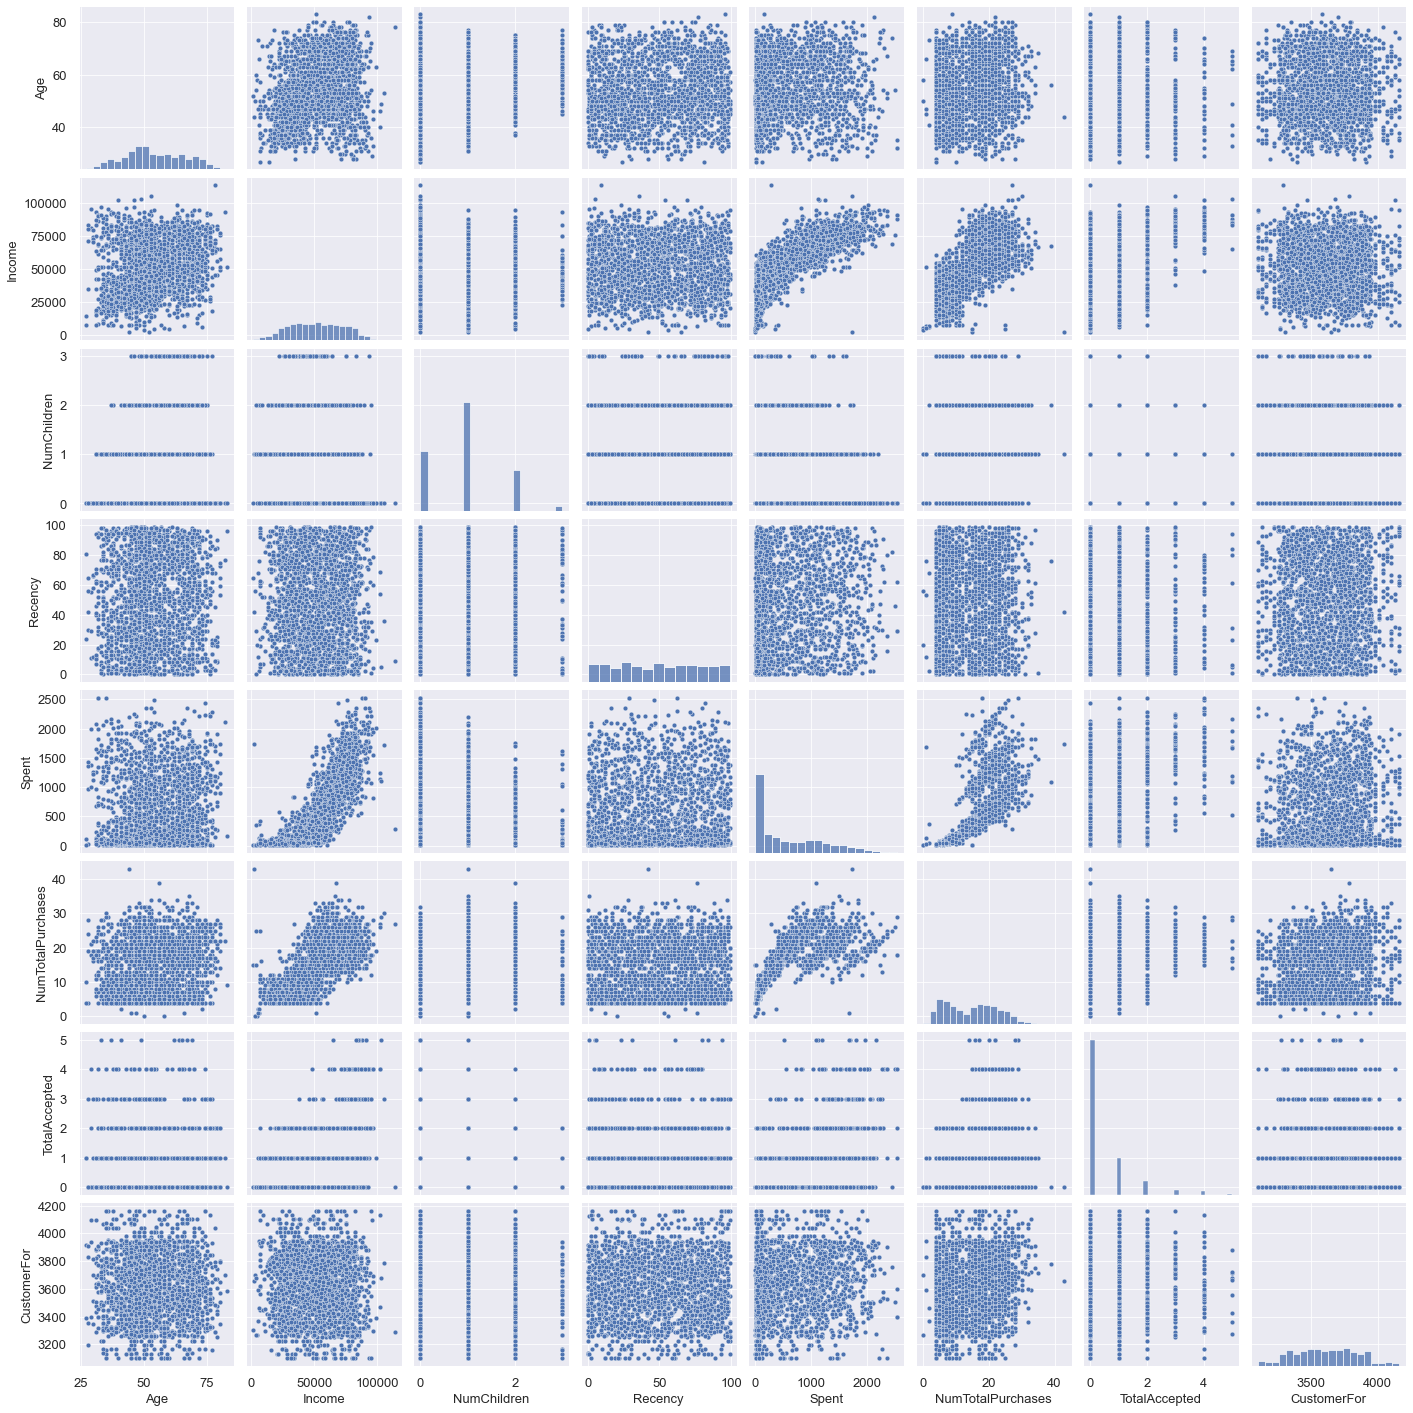

In [901]:
sns.pairplot(data=data_cleaned[Numericals], kind ='scatter')
plt.show()

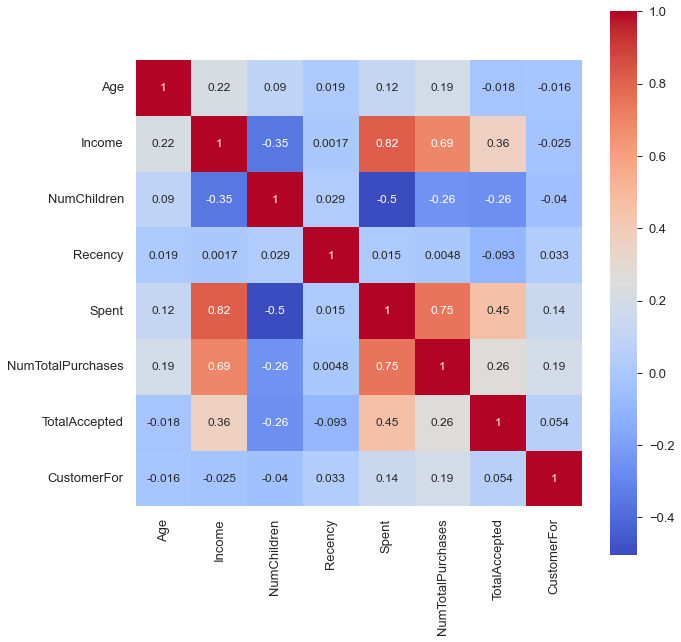

In [902]:
corr_mat = data_cleaned[Numericals].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', square=True)
plt.show()

'Spent', 'NumTotalPurcahses', 'Income' show strong linear relationships 

## Data Preprocessing

In [903]:
data_cleaned[Numericals]

Age   Income  NumChildren  Recency  Spent  NumTotalPurchases  \
ID                                                                    
5524    66  58138.0            0       58   1617                 25   
2174    69  46344.0            2       38     27                  6   
4141    58  71613.0            0       26    776                 21   
6182    39  26646.0            1       26     53                  8   
5324    42  58293.0            1       94    422                 19   
...    ...      ...          ...      ...    ...                ...   
8080    37  26816.0            0       50     22                  4   
10870   56  61223.0            1       46   1341                 18   
7270    42  56981.0            0       91   1241                 19   
8235    67  69245.0            1        8    843                 23   
9405    69  52869.0            2       40    172                 11   

       TotalAccepted  CustomerFor  
ID                                 
5524               1         4071  
2174               0         3225  
4141               0         3572  
6182               0         3165  
5324               0         3421  
...              ...          ...  
8080               0         3941  
10870              0         3641  
7270               1         3415  
8235               0         3416  
9405               1         3882  

[2047 rows x 8 columns]

In [904]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 5524 to 9405
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2047 non-null   int64         
 1   Education            2047 non-null   object        
 2   Marital_Status       2047 non-null   object        
 3   Income               2047 non-null   float64       
 4   Kidhome              2047 non-null   int64         
 5   Teenhome             2047 non-null   int64         
 6   Dt_Customer          2047 non-null   datetime64[ns]
 7   Recency              2047 non-null   int64         
 8   Wines                2047 non-null   int64         
 9   Fruits               2047 non-null   int64         
 10  Meat                 2047 non-null   int64         
 11  Fish                 2047 non-null   int64         
 12  Sweets               2047 non-null   int64         
 13  Gold                 2047 non-

In [905]:
# Find the categorical variable columns
s = (data_cleaned.dtypes == 'object')
oc = list(s[s].index)
print('The categorical columns are: ', oc)

The categorical columns are:  ['Education']


In [906]:
# Still we want to transfrom categorical education to onumerical one
# Apply Label Encoding to categorical variables
LE = LabelEncoder()
data_cleaned['Education'] = data_cleaned[['Education']].apply(LE.fit_transform)

In [907]:
data_cleaned[['Education']].head(3)

Education
ID             
5524          3
2174          3
4141          3

In [908]:
# Apply Label Encoding to categorical variables
#LE = LabelEncoder()
#for i in oc:
#    data_cleaned[i] = data_cleaned[[i]].apply(LE.fit_transform)              

In [909]:
# Since we already have NumChildren, total number purchases, total accepted, and total spent. We delete the individual columns.
data_cleaned.drop(columns =['Kidhome', 'Teenhome','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'percentWines', 'percentMeat', 'percentFruits', 'percentFish', 'percentSweets', 'percentGold'], inplace=True)


In [910]:
data_cleaned.head()

Education   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
ID                                                                           
5524          3  58138.0       58    635      88   546   172      88    88   
2174          3  46344.0       38     11       1     6     2       1     6   
4141          3  71613.0       26    426      49   127   111      21    42   
6182          3  26646.0       26     11       4    20    10       3     5   
5324          2  58293.0       94    173      43   118    46      27    15   

      NumWebVisitsMonth  Age  CustomerFor  HasPartner  NumChildren  \
ID                                                                   
5524                  7   66         4071           0            0   
2174                  5   69         3225           0            2   
4141                  4   58         3572           1            0   
6182                  6   39         3165           1            1   
5324                  5   42         3421           1            1   

      HasChildren  Spent  NumTotalPurchases  TotalAccepted  
ID                                                          
5524            0   1617                 25              1  
2174            1     27                  6              0  
4141            0    776                 21              0  
6182            1     53                  8              0  
5324            1    422                 19              0

In [911]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 5524 to 9405
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2047 non-null   int64  
 1   Income             2047 non-null   float64
 2   Recency            2047 non-null   int64  
 3   Wines              2047 non-null   int64  
 4   Fruits             2047 non-null   int64  
 5   Meat               2047 non-null   int64  
 6   Fish               2047 non-null   int64  
 7   Sweets             2047 non-null   int64  
 8   Gold               2047 non-null   int64  
 9   NumWebVisitsMonth  2047 non-null   int64  
 10  Age                2047 non-null   int64  
 11  CustomerFor        2047 non-null   int64  
 12  HasPartner         2047 non-null   int64  
 13  NumChildren        2047 non-null   int64  
 14  HasChildren        2047 non-null   int64  
 15  Spent              2047 non-null   int64  
 16  NumTotalPurchases  20

We have reduce the number of the column from 29 to 18

In [912]:
# Scaling
scaler = StandardScaler()
scaler.fit(data_cleaned)
data_scaled = pd.DataFrame(scaler.transform(data_cleaned), columns=data_cleaned.columns)

In [913]:
data_scaled

Education    Income   Recency     Wines    Fruits      Meat      Fish  \
0      0.889260  0.314032  0.312418  0.980108  1.553335  1.716865  2.458671   
1      0.889260 -0.259056 -0.377835 -0.873588 -0.636404 -0.722213 -0.647922   
2      0.889260  0.968801 -0.791986  0.359239  0.571728 -0.175679  1.343952   
3      0.889260 -1.216210 -0.791986 -0.873588 -0.560895 -0.658978 -0.501729   
4     -0.217988  0.321563  1.554872 -0.392340  0.420712 -0.216330  0.156138   
...         ...       ...       ...       ...       ...       ...       ...   
2042   0.889260 -1.207949  0.036317 -0.891412 -0.636404 -0.722213 -0.629648   
2043   0.889260  0.463936 -0.101734  1.199938  0.420712  0.072746  0.083041   
2044   0.889260  0.257811  1.451334  1.791101  0.546559  0.230834 -0.099700   
2045  -1.325236  0.853737 -1.413213  0.365180  0.093509  0.217284  0.777456   
2046  -0.217988  0.058003 -0.308810 -0.656729 -0.586065 -0.473789 -0.647922   

        Sweets      Gold  NumWebVisitsMonth       Age  CustomerFor  \
0     1.453602  0.846196           0.684450  1.017833     1.977337   
1    -0.629293 -0.729791          -0.139708  1.274919    -1.660998   
2    -0.150467 -0.037894          -0.551787  0.332273    -0.168679   
3    -0.581410 -0.749010           0.272371 -1.295934    -1.919036   
4    -0.006819 -0.556816          -0.139708 -1.038849    -0.818074   
...        ...       ...                ...       ...          ...   
2042 -0.557469 -0.787449          -0.551787 -1.467324     1.418255   
2043  2.171842  3.902072          -0.139708  0.160882     0.128065   
2044 -0.365938 -0.383842           0.272371 -1.038849    -0.843878   
2045  0.065005  0.327273          -0.963866  1.103528    -0.839577   
2046 -0.629293 -0.441500           0.684450  1.274919     1.164518   

      HasPartner  NumChildren  HasChildren     Spent  NumTotalPurchases  \
0      -1.330398    -1.277754    -1.605824  1.681222           1.331727   
1      -1.330398     1.393914     0.622733 -0.962739          -1.167784   
2       0.751655    -1.277754    -1.605824  0.282749           0.805514   
3       0.751655     0.058080     0.622733 -0.919504          -0.904677   
4       0.751655     0.058080     0.622733 -0.305906           0.542408   
...          ...          ...          ...       ...                ...   
2042   -1.330398    -1.277754    -1.605824 -0.971053          -1.430890   
2043    0.751655     0.058080     0.622733  1.222270           0.410855   
2044   -1.330398    -1.277754    -1.605824  1.055983           0.542408   
2045    0.751655     0.058080     0.622733  0.394162           1.068621   
2046    0.751655     1.393914     0.622733 -0.721623          -0.510018   

      TotalAccepted  
0          0.611228  
1         -0.508901  
2         -0.508901  
3         -0.508901  
4         -0.508901  
...             ...  
2042      -0.508901  
2043      -0.508901  
2044       0.611228  
2045      -0.508901  
2046       0.611228  

[2047 rows x 18 columns]

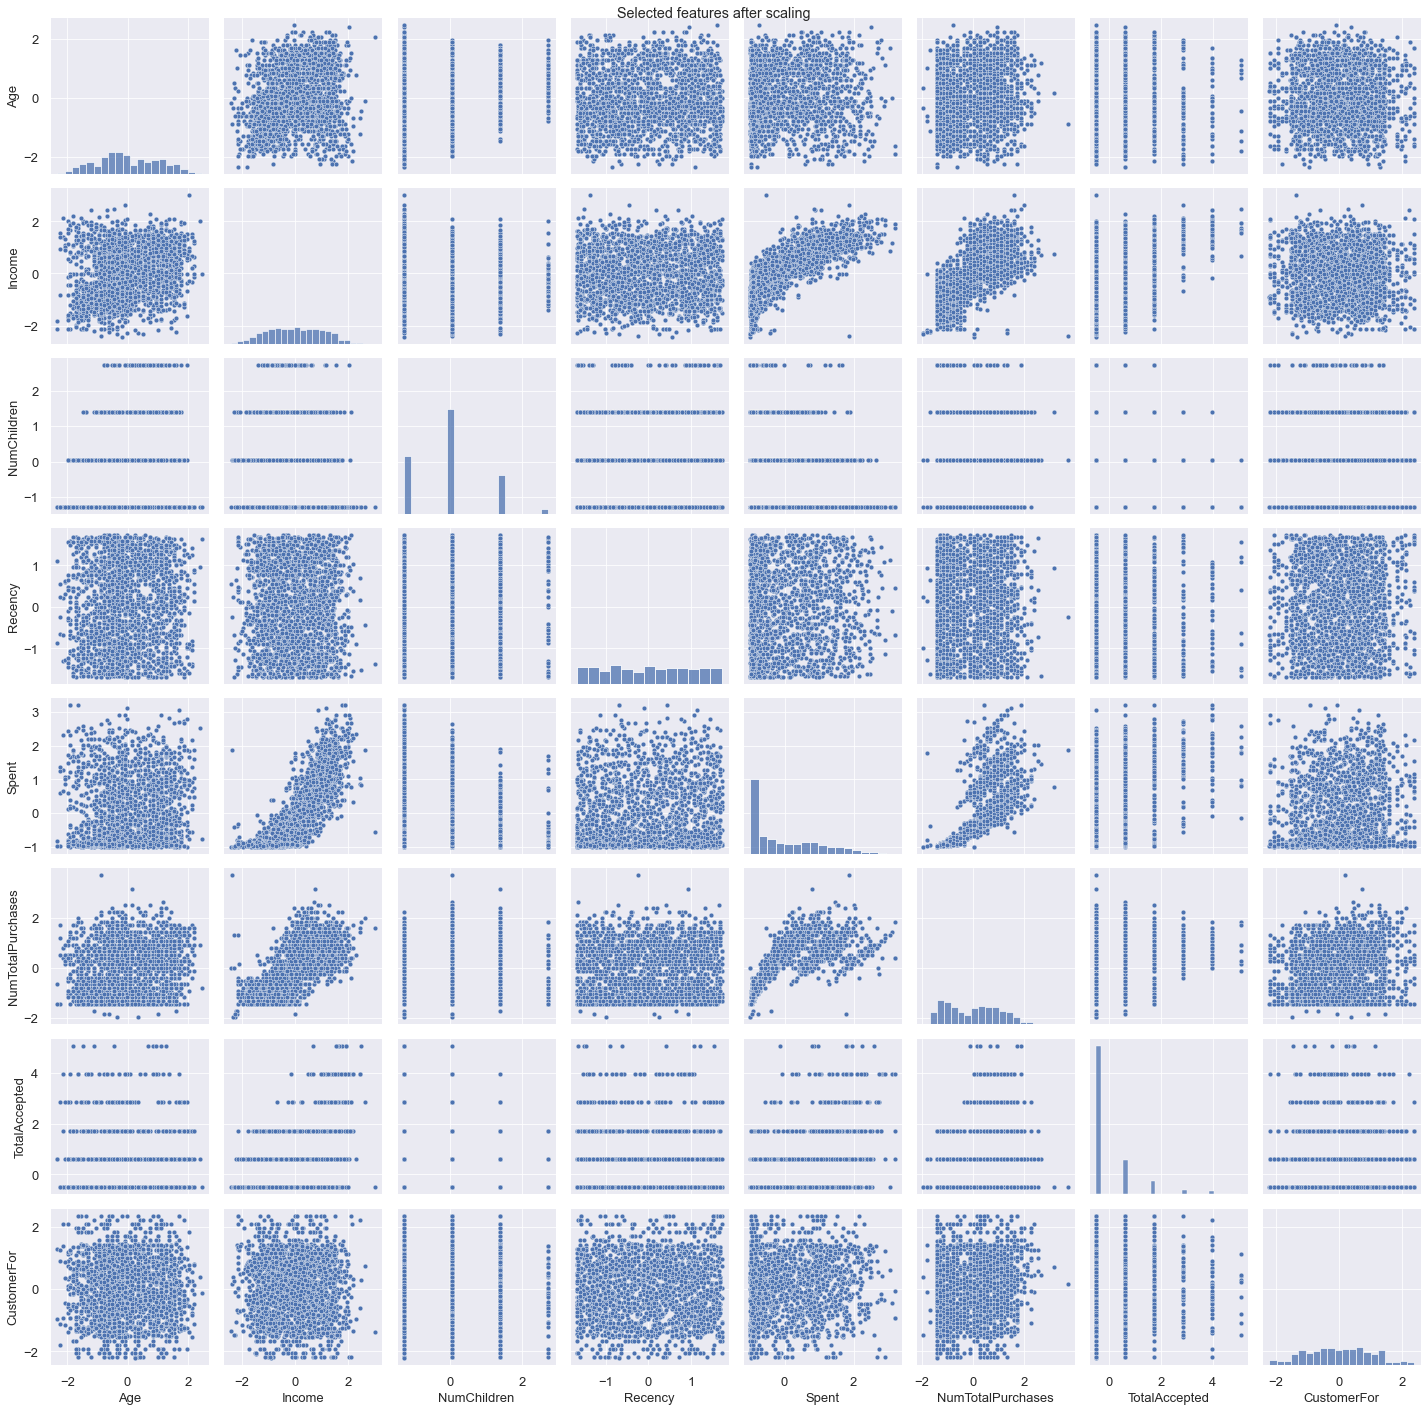

In [914]:
g = sns.pairplot(data=data_scaled[Numericals], 
             kind='scatter')
g.fig.suptitle('Selected features after scaling')
plt.tight_layout()

The pattern of the numericals are same but scaled accordingly.

In [915]:
data_scaled.isna().sum()

Education            0
Income               0
Recency              0
Wines                0
Fruits               0
Meat                 0
Fish                 0
Sweets               0
Gold                 0
NumWebVisitsMonth    0
Age                  0
CustomerFor          0
HasPartner           0
NumChildren          0
HasChildren          0
Spent                0
NumTotalPurchases    0
TotalAccepted        0
dtype: int64

### Dimension Reduction

In [932]:
# Initiate PCA and reduce the dimension aka features to 7 
pca = PCA(n_components=10)
pca.fit(data_scaled)
df_pca = pd.DataFrame(pca.transform(data_scaled),columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10'])

In [933]:
df_pca.describe().T

count          mean       std       min       25%       50%       75%  \
col1   2047.0  1.909128e-17  2.601502 -4.514049 -2.312853 -0.797698  2.059608   
col2   2047.0  6.508391e-19  1.239249 -3.454189 -0.827434 -0.086429  0.821306   
col3   2047.0  3.898255e-17  1.131199 -3.122668 -0.834347 -0.042701  0.770745   
col4   2047.0  3.915882e-17  1.084343 -3.709980 -0.653920 -0.013211  0.634153   
col5   2047.0  6.454154e-18  1.012345 -2.377874 -0.769716  0.068530  0.726897   
col6   2047.0 -1.861671e-17  1.001695 -2.665801 -0.746857  0.008378  0.706945   
col7   2047.0 -2.056923e-17  0.970053 -3.319966 -0.683758  0.012913  0.660585   
col8   2047.0 -2.212853e-17  0.911719 -2.690638 -0.612484 -0.033814  0.581629   
col9   2047.0 -4.496213e-17  0.813665 -2.534784 -0.442905 -0.090578  0.298254   
col10  2047.0 -2.039296e-17  0.759120 -3.029928 -0.467586 -0.025988  0.411560   

            max  
col1   7.554820  
col2   4.140471  
col3   4.510031  
col4   5.039015  
col5   2.431317  
col6   3.249829  
col7   4.216476  
col8   4.260567  
col9   5.052189  
col10  3.490385

In [934]:
pca.explained_variance_ratio_

array([0.37580582, 0.08527716, 0.0710548 , 0.06529029, 0.0569079 ,
       0.05571677, 0.05225241, 0.04615701, 0.03676266, 0.03199895])

In [935]:
pca.explained_variance_ratio_.sum()

0.8772237836450951

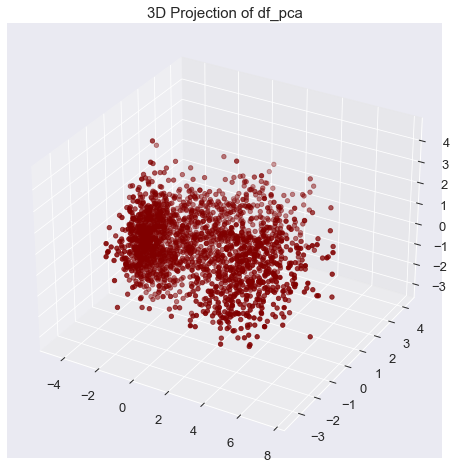

In [920]:
# 3D Projection of Data after Dimension Reduction
#x = df_pca['col1']
#y = df_pca['col2']
#z = df_pca['col3']

#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y ,z, c='maroon', marker='o')
#ax.set_title('3D Projection of df_pca')
#plt.show()

## Clustering

Elbow Method to determine the number of clusters to be formed:


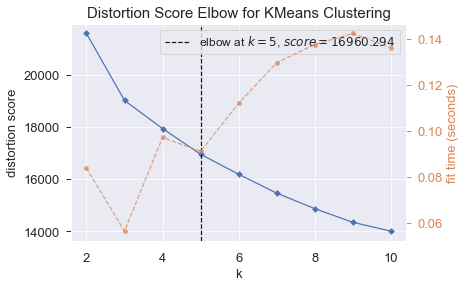

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [936]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [939]:
# We set n_clusters = 5 as Elbow Method shows
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df_pca)

pred = kmeans.predict(df_pca)

dfc_pca = df_pca.copy()
dfc_pca['Cluster'] = pred + 1
df['Cluster'] = pred + 1

In [940]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 5524 to 9405
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2047 non-null   int64         
 1   Education            2047 non-null   object        
 2   Marital_Status       2047 non-null   object        
 3   Income               2047 non-null   float64       
 4   Kidhome              2047 non-null   int64         
 5   Teenhome             2047 non-null   int64         
 6   Dt_Customer          2047 non-null   datetime64[ns]
 7   Recency              2047 non-null   int64         
 8   Wines                2047 non-null   int64         
 9   Fruits               2047 non-null   int64         
 10  Meat                 2047 non-null   int64         
 11  Fish                 2047 non-null   int64         
 12  Sweets               2047 non-null   int64         
 13  Gold                 2047 non-

In [926]:
#fig = px.scatter_3d(data_cleaned_clustered, x="Income", y="AvgCheck", z="MntTotal", color='Cluster', width=800, height=800)
#fig.show()

NameError: name 'data_cleaned_clustered' is not defined

In [438]:
#fig = plt.figure(figsize=(12,8))

#fig = px.scatter_3d(dfc_pca, x, y , z, color='Cluster', width=800, height=800)
#ax.set_title("The Plot Of The Clusters")
#fig.show()

<Figure size 864x576 with 0 Axes>

In [441]:
#fig = px.scatter_3d(dfc_pca, x='col1', y='col2', z='col3', color='Cluster', width=800, height=800)
#fig.show()

## Cluster Analysis

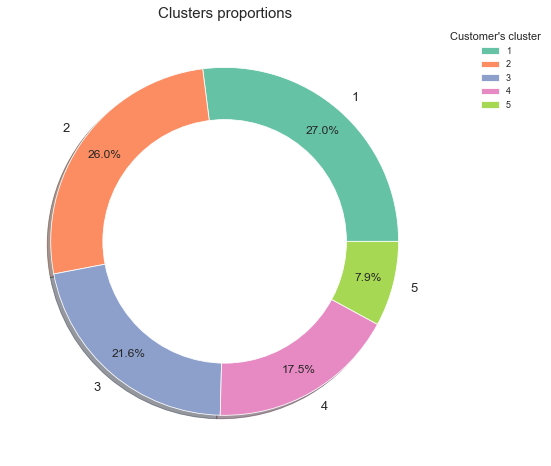

In [941]:
sizes = dict(df['Cluster'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palette)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Cluster 1 and 2 are the top 2 clusters, which are all above 25%. Cluster 5 has the minimum number of customers.

## Income

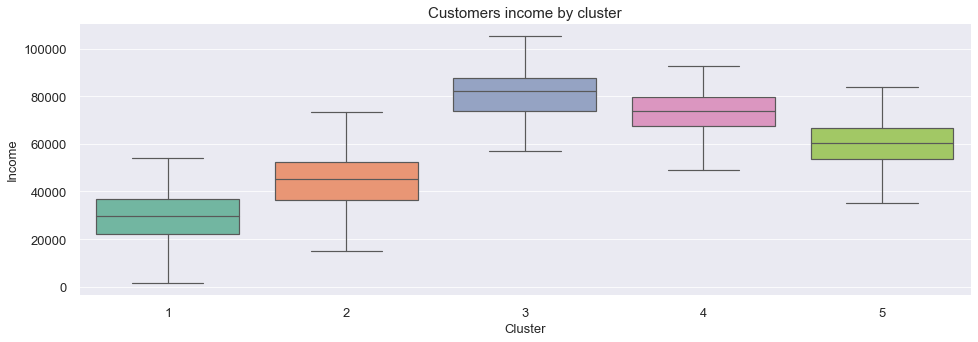

In [942]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df, x='Cluster', y='Income', palette=palette, showfliers=False)
plt.show()

Cluster 1: Lowest

Cluster 2: Low

Cluster 3: Highest

Cluster 4: High

Cluster 5: Medium

## Education

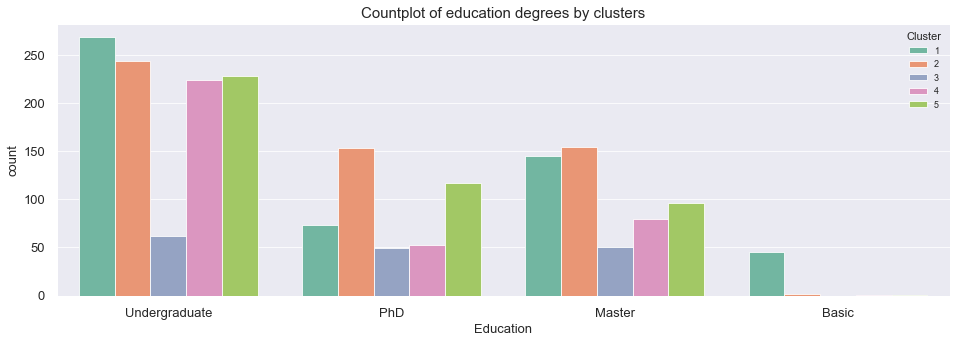

In [943]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df, x='Education', hue='Cluster', palette=palette)
plt.show()

The basic degree contains almost only cluster 1
Cluster 3 is evenly destributed in undergraduate, phd, and master

## Has Children

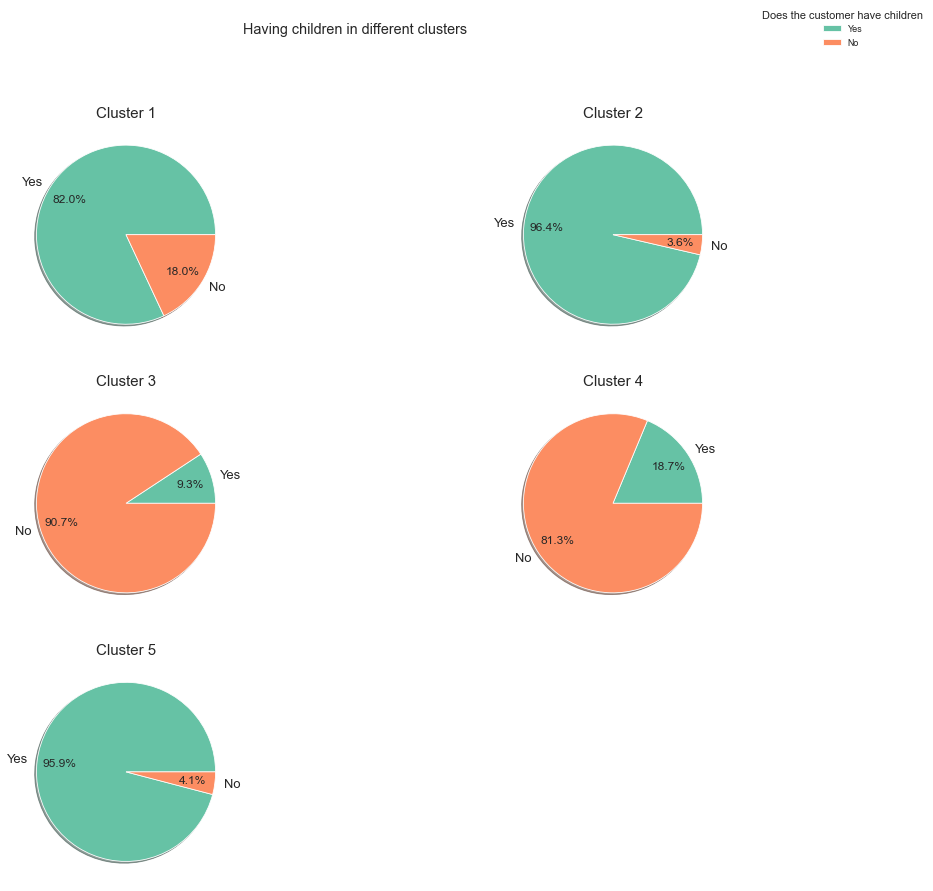

In [966]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))   
k = 0
for i in range(0, 3):
    for j in range(0, 2):
        if k < 5:
            k += 1
            sizes = dict(df.query(f'Cluster == {k}')['HasChildren'].value_counts().sort_index(ascending=False))
            axes[i, j].set_title(f"Cluster {k}")
            axes[i, j].pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=palette)

fig.suptitle('Having children in different clusters')
fig.legend(title="Does the customer have children",labels=['Yes', 'No'], bbox_to_anchor=(1, 1)) 
fig.show()

# Hide the plot
if k < 6:
    axes[2,1].axis('off')
fig.show()

Clusters 1, 2, 5 are mostly parents, while clusters 3, 4 are not.

## Shopping style

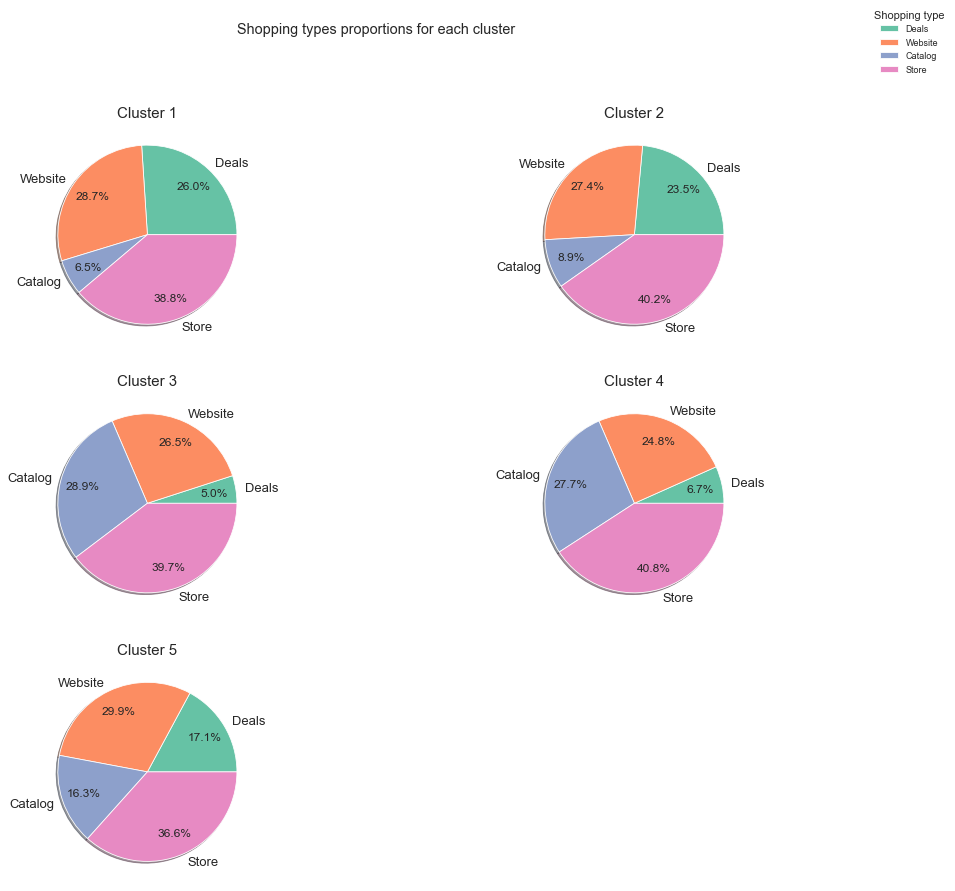

In [965]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))   
k = 0
for i in range(0, 3):
    for j in range(0, 2):
        if k < 5:
            k += 1
            num = df.query(f'Cluster == {k}').filter(regex='Num[^Total].+Purchases').sum(axis=0)
            sizes = dict(num)
            axes[i, j].set_title(f"Cluster {k}")
            axes[i, j].pie(sizes.values(), labels=['Deals','Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=palette)

fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Deals', 'Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()

# Hide the plot
if k < 6:
    axes[2,1].axis('off')
fig.show()

Most customers in each clusters are shopping from Store and website.
Customers from cluster 1 and 2 prefer discount and less on catalog.
Customers from cluster 1 and 2 prefer catalog and less on deals.
Customers from 5 like equally on catalog and deals.

## Web Visits last month

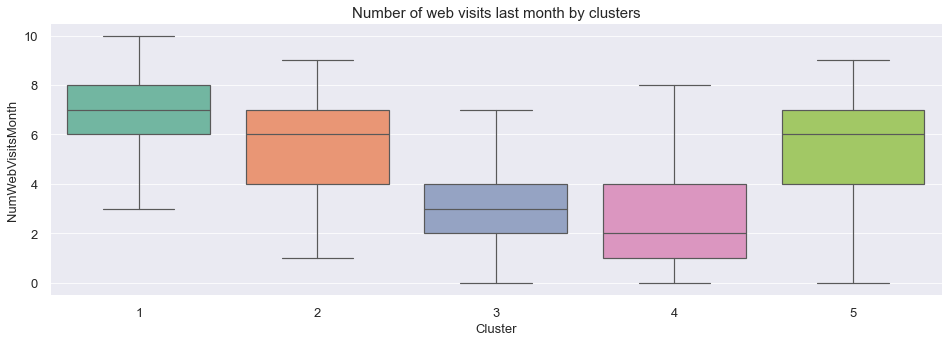

In [967]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits last month by clusters')
ax = sns.boxplot(data=df, x='Cluster', y='NumWebVisitsMonth', palette=palette, showfliers=False)
plt.show()

CLusters 1, 2, 5 visit website more often than clusters 3 and 4

## Percent spent

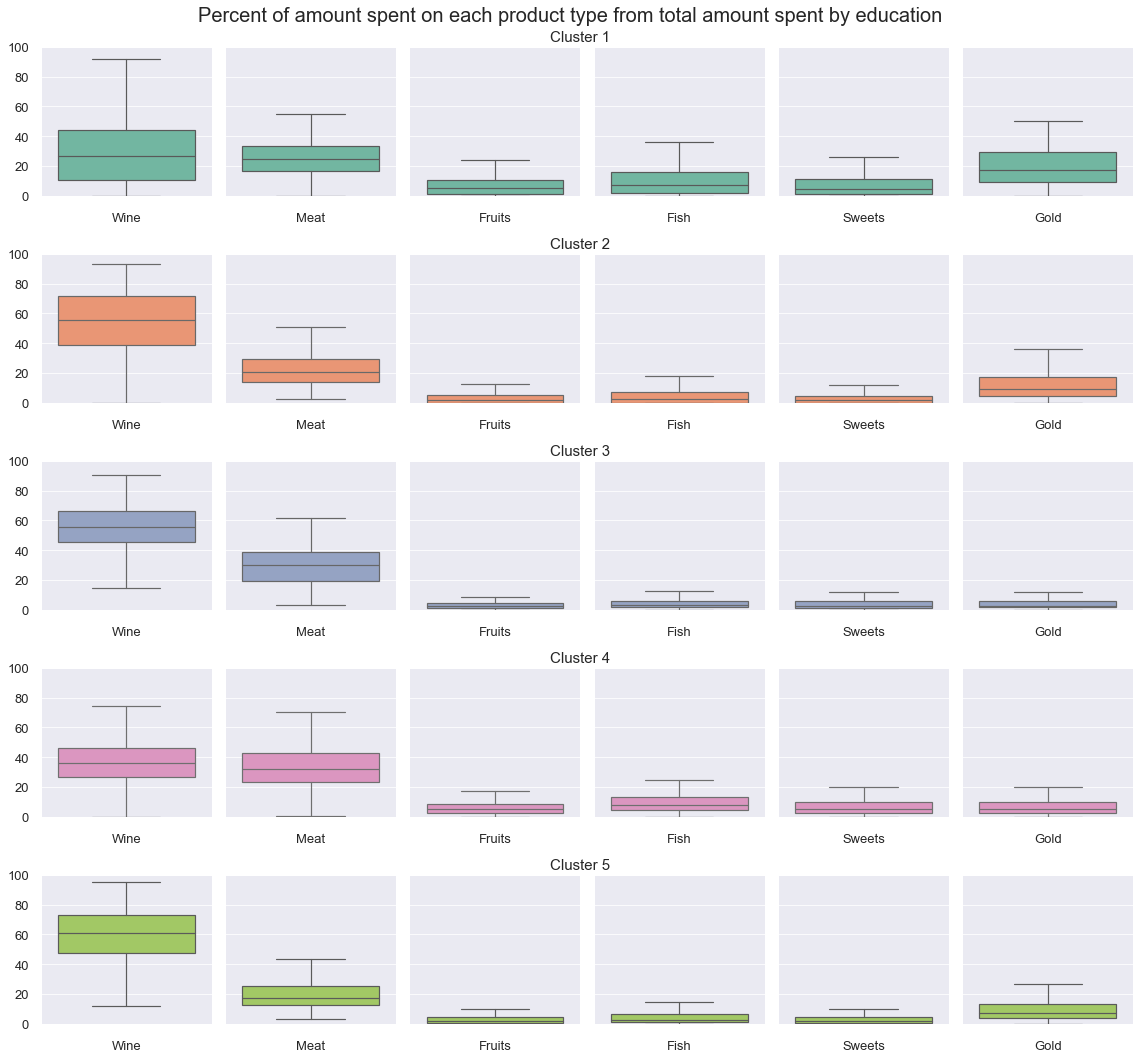

In [959]:
fig, axes = plt.subplots(5, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by education', fontsize=20)

for i, value in enumerate(sorted(df['Cluster'].unique())):
    sns.boxplot(data=df.query(f'Cluster == {value}'), y='percentWines', showfliers=False, color=palette[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=df.query(f'Cluster == {value}'), y='percentMeat', showfliers=False, color=palette[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=df.query(f'Cluster == {value}'), y='percentFruits', showfliers=False, color=palette[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Cluster {value}', x=1)
    
    sns.boxplot(data=df.query(f'Cluster == {value}'), y='percentFish', showfliers=False, color=palette[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=df.query(f'Cluster == {value}'), y='percentSweets', showfliers=False, color=palette[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=df.query(f'Cluster == {value}'), y='percentGold', showfliers=False, color=palette[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

Wine and meat are relative more popular among all cluster custmers.
Cluster 2, 3, 5 love wine most.
cluster 1 love gold most. Cluster 2 and 5 love relatively more compared to the cluster 3 and 4.
Cluster 1, 4 likes fish more relatively
cluster 5 doesn't buy meat as much as the rest.

## Accepted Compaign

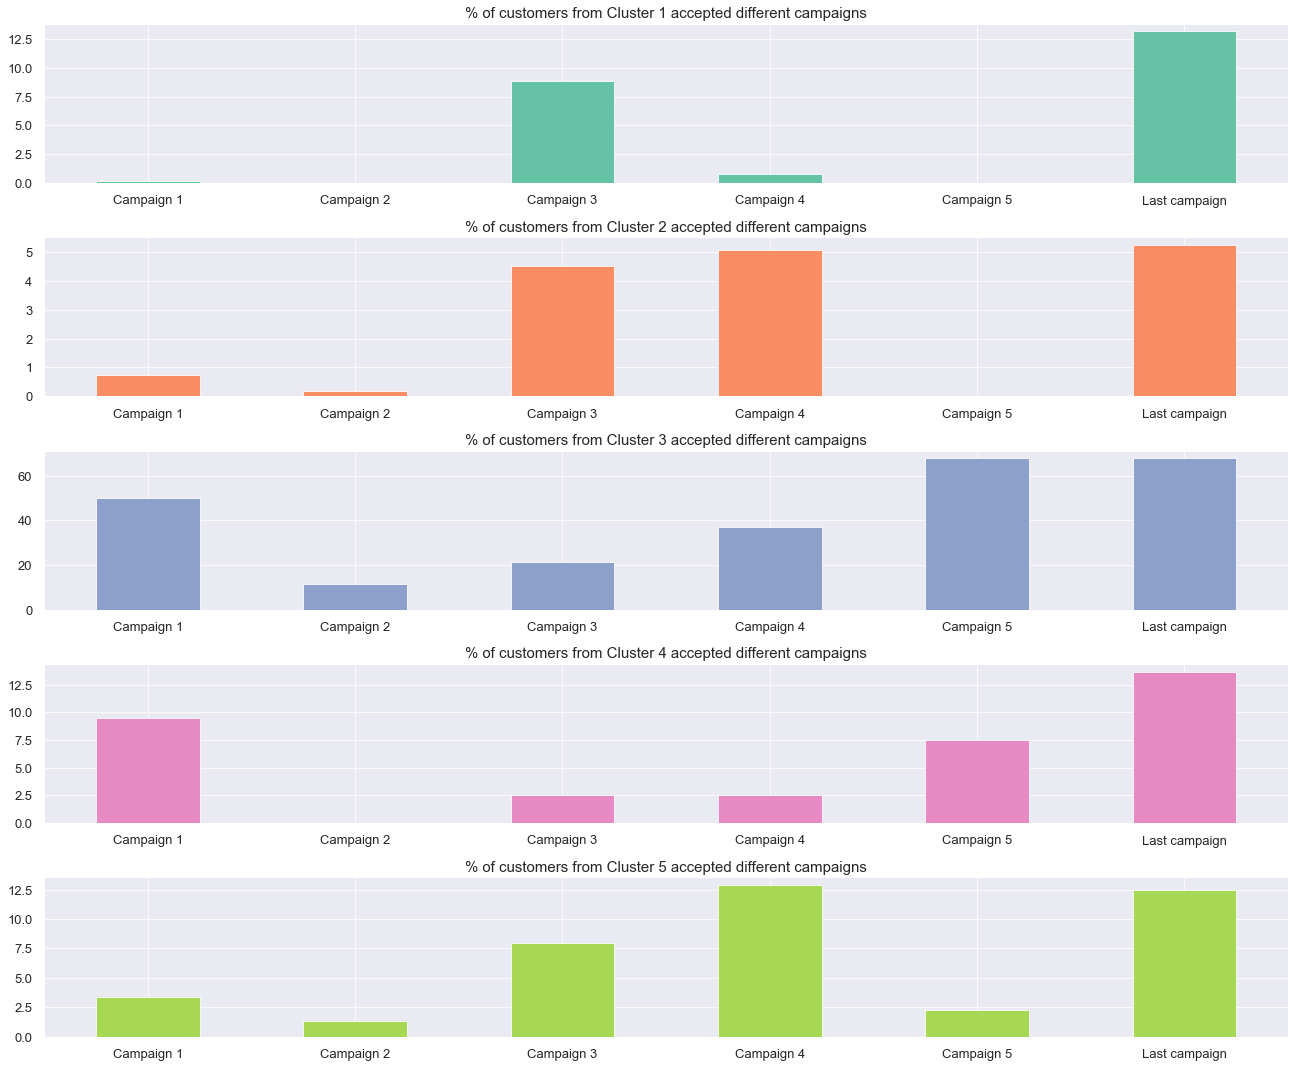

In [972]:
fig, axes = plt.subplots(5, 1, figsize=(16, 20))

for i in range(1, 6):
    ax = (df.query(f'Cluster == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(df.query(f'Cluster == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted different campaigns', ax=axes[i-1], color=palette[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

1. The last campaign is successful in all clusters.
2. Cluster 1 shows interest most in campaign 3, and none in the rest.
3. Cluster 2 shows interest most in campaign 3 and 4, little in 1 
4. Cluster 3 shows highest interest in 5, high in 1, medium in 3 and 4, low in 2
5. Cluster 4 shows interest most in 1 and 5, medium in 3 and 4
6. Cluster 5 shows the highest interest in camoaign 4, high in 3, little in 1 and 5

## Complaint

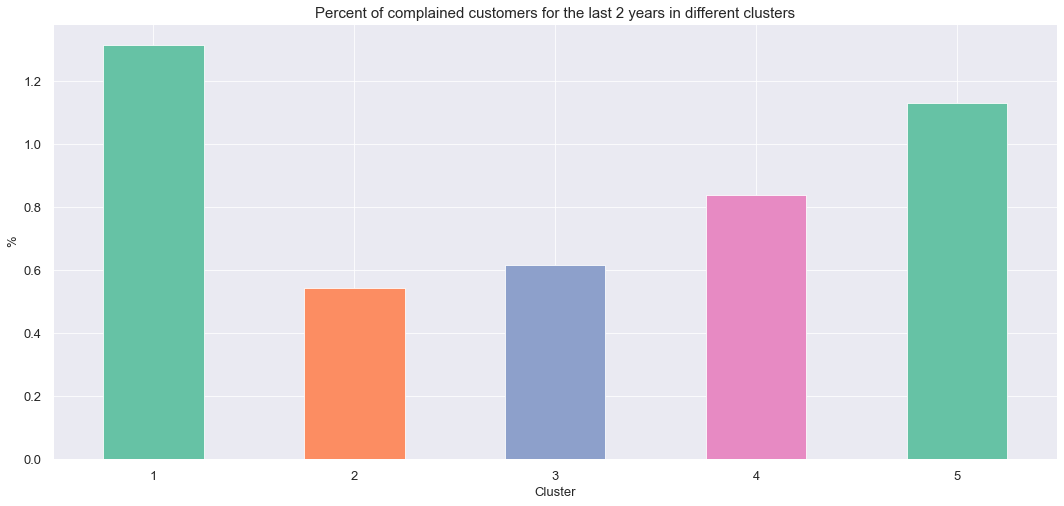

In [973]:
complains_by_cluster = (df.groupby(by='Cluster')['Complain'].sum()
                                      .divide(df['Cluster'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', figsize=(18, 8), color=palette[:4], 
                               title='Percent of complained customers for the last 2 years in different clusters',
                               ylabel='%', xlabel='Cluster')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

The customers' complained rate ranges from around 0.56% to 1.31%
Most complaint in cluster 1 and 5.

# Customer personality analysis cluster summary



Cluster 1: (27% customer proportion)
Lowest Income
Basically all basic degree
Most have children
Don't prefer catalog, other shopping styles evenly distributed
High web visit
Prefer wine, meat and gold. Highest gold demand
Prefer campaign 3, and last campaign
1st complain rate

Cluster 2: (26% customer proportion)
Low Income
Various degrees except basic
Almost all have children
Don't prefer catalog, other shopping styles evenly distributed
Medium web visit
Prefer wine, meat. High wine demand
Prefer campaign 3, 4 and last campaign
5th complain rate

Cluster 3: (21.6% customer proportion)
Highest Income
Various degrees except basic
Most don't have children
Don't prefer deals, other shopping styles evenly distributed
Medium web visit
Prefer wine, meat. High wine demand
Accept all campaigns. Prefer campaign 1, 4, 5 and last campaign
4th complain rate

Cluster 4: (17.5% customer proportion)
High Income
Various degrees except basic
Almost all don't have children
Don't prefer deals, other shopping styles evenly distributed
Low medium visit
Prefer wine, meat. 
Accept all campaigns except 2. Prefer campaign 1, 5 and last campaign
3rd complain rate

Cluster 5: (7.9% customer proportion)
Medium Income
Various degrees except basic
Almost all have children
Even distributed shopping styles
Low medium visit
Prefer wine, meat. High wine demand
Accept all campaigns. Prefer campaign 3, 4, and last campaign
2nd complain rate


In [975]:
# Export df as Excel
df.to_excel('Customer_Personality_Analysis.xlsx', index=False)